# Poisson distribution and PCA analysis of genes in Mice

Here we explore natural and perturbed mice generated with a Poisson distribution.

Of course, one can wonder about the naturality of mice versus wild mice. Are they breed in a lab and natural? Would a lab-breed human be a natural human? Is the distance from a wild mouse to a lab mouse important?

Furthermore, what are perturbations? Well, it is a change enforced by an experiment. Perhaps we knock out a single Mendelian gene and our mouse no longer gets Hay fever in the spring. We find to our horror that our mice are susceptible to cat bites and decide through bacterial yogurt technology to alter our mice with added armor, lots of hard scaled dragon-like armor.  

#Feel Free to Skip ahead to the code. There is a short intro about the distribution used. Then code with comments and conclusions and recommendations.

# The Poisson distribution

The Poisson distribution deals with the number of occurrences in a fixed time.

In Poisson Ville, the arrival times of busses are independent of when the previous bus came. A Poisson process consists of events that have no memory and are independent of when the last event happened. 

In any given year, the number of childbirths in a hospital can be described by an average number. But each birth is independent of the others. 

Philosophically, this may not be the case. The number of molecular collisions in a gas, or heat dispersion, looks to us from our frame of reference like a random mess. 
There are phenomena that in the future will turn out not to be so random even though they appear that way. These phenomena make total sense from some other frame of reference. 

Say we do a Bernoulli trial each minute for an hour for a total of 60 trials. Each trail has a success probability of 10%. The number of successes would be Binomially distributed, and we would expect to get about six successful trials. 
The Poisson story would be an average of six hits(arrivals) on a website per hour. So, the Poisson distribution with an arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). 
The Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In NumPy:
numpy.random.poisson(lam=1.0, size=None)
Draw samples from a Poisson distribution.

numpy.random.binomial(n, p, size=None)
Draw samples from a binomial distribution.

The Poisson distribution is the limit of the binomial distribution for large N.
Ït is used here because it puts rare events into our distribution so there will actually be a difference.

In [77]:
import pandas as pd # panel data
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
plt.style.use('ggplot')

In [78]:
genes = ['gene'+str(i) for i in range(1,101,1)]
wt= ['natural'+str(i) for i in range(1,6,1)]
ko= ['pertubation'+str(i) for i in range(1,6,1)]

# The transposed version Data in Scikit Learn here one row is a feature and a column is an obeservation.
# Machine learning wants it the other way.
df = pd.DataFrame(columns=[*wt,*ko], index = genes) 

# Making an Array of 5 with values from 10-1000 to populate to dataframe that is currently empty/nan
for gene in df.index:
    df.loc[gene, 'natural1':'natural5'] = np.random.poisson(rd.randrange(10,1000), size = 5) # size = number of genes
    df.loc[gene, 'pertubation1':'pertubation5'] = np.random.poisson(rd.randrange(10,1000), size=5)
print(df.head())
# Note Gene5 has a very large difference between the classes Natural and Pertubation
# The maximum difference would be 10 - 1000 so 55 to 700 is quite close.

      natural1 natural2 natural3 natural4 natural5 pertubation1 pertubation2  \
gene1       22       27       18       25       29          146          152   
gene2      271      257      277      278      263          102           84   
gene3      143      124      103       95      117          447          411   
gene4       93       81       97       80       80          722          741   
gene5       57       53       69       55       50          669          734   

      pertubation3 pertubation4 pertubation5  
gene1          156          163          151  
gene2           90           91           98  
gene3          399          442          438  
gene4          668          725          726  
gene5          696          711          724  


In [79]:
scaler = StandardScaler()
# Flip the DataFrame to a Row-Observation style 
# Scale the data to have a mean of 0 and std of 1
# The scaling is done by (x - mean)**2 / number of observations for each value.
scaled_data = scaler.fit_transform(df.T) # Also changes the data to Numpy Array
# Make Labels and Turn it to a Supervised Machine learning Scenario is possible here

In [80]:
print(type(scaled_data))

<class 'numpy.ndarray'>


In [81]:
df_scaled = pd.DataFrame(scaled_data, columns=df.index, index=df.columns)
print(df_scaled.loc[['natural1','natural3','pertubation1'], 'gene1':'gene5'])

                 gene1     gene2     gene3     gene4     gene5
natural1     -1.031101  1.016973 -0.823527 -0.976743 -0.998057
natural3     -1.092751  1.084846 -1.079083 -0.964070 -0.961183
pertubation1  0.880058 -0.894800  1.118694  1.016028  0.882519


In [82]:
pca = PCA()
pca.fit(scaled_data) # Loading scores and variation for each component
pca_data = pca.transform(scaled_data) # Another Numpy array.

In [83]:
print(type(pca_data))
print(len(pca_data)) # Standard is 10 components. 

<class 'numpy.ndarray'>
10


In [84]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=2) 
print(per_var)
labels = ['PCA'+str(i) for i in range(1,len(per_var)+1)]

[88.04  2.87  2.35  2.    1.66  1.15  1.03  0.66  0.25  0.  ]


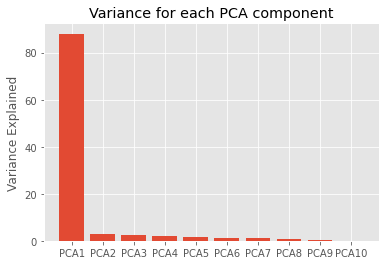

In [85]:
plt.bar(x=labels,height=per_var)
plt.ylabel('Variance Explained')
plt.title('Variance for each PCA component')
plt.show()
# Most of the data can be explained by PCA1 if we also use PCA2 we can make a 2D graph to represent the data.

In [86]:
pca_df = pd.DataFrame(pca_data, columns=labels, index=df.columns)
#print(pca_df.head())

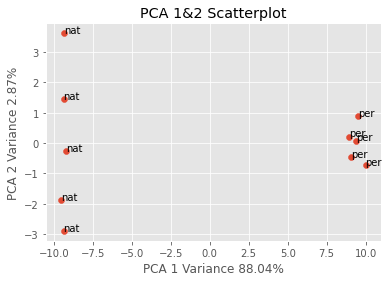

In [87]:
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.title('PCA 1&2 Scatterplot')
plt.xlabel(f"PCA 1 Variance {per_var[0]}%")
plt.ylabel(f"PCA 2 Variance {per_var[1]}%")
for sample in pca_df.index:
    plt.annotate(sample[:3],(pca_df.PCA1.loc[sample], pca_df.PCA2.loc[sample]) ) # Text, (positionx,positiony)
plt.show()

We see that the permuation samples are clustered and correlated on the left and the natural samples on the right. The separation of the clusters means that the types are very different from each other. We saw that in the second and the forth gene in the original data.


In [92]:
# the loding scores for different genes will show the impact of different genes to separate the samples
loading_scores = pd.Series(pca.components_[0], index =genes)
#sorted_scores = loading_scores.abs().sort_values(ascending=False)
#print(sorted_scores[:10]) The gene names but in absolute scores
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False) 
# Boolean indexing the sorted scores gives the correct loading scores positive or negative.
top_10_genes = sorted_loading_scores[0:10].index.values 
print(loading_scores[top_10_genes])

gene5     0.106481
gene4     0.106466
gene63    0.106405
gene33   -0.106397
gene54    0.106360
gene48    0.106359
gene30    0.106350
gene68   -0.106347
gene78    0.106347
gene31   -0.106344
dtype: float64


In [94]:
print(loading_scores[sorted_loading_scores[-3:].index.values])

gene15    0.015829
gene85    0.002999
gene97    0.002468
dtype: float64


# Conclusions and recommendations
We can see that some genes made up a lot of the difference and others made up very little of the difference. PCA1 was quite dominant in explaining variance, and some genes are not very helpful in PCA1.
The use of these conclusions? 
We could for our models, exclude data from the tail-end of our sorted data if we run into a computational load problem. 

In [89]:
#https://matplotlib.org/3.1.1/gallery/style_sheets/ggplot.html